In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import glob
import matplotlib.pyplot as plt


## MDTB as training dataset
MDTB dataset is used for training the models. 

In [4]:
df=rm.comb_eval(models=['MDs1'])

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

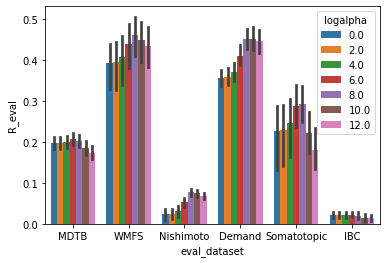

In [5]:
sns.barplot(data=df,x='eval_dataset',y='R_eval',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='noiseceiling_XY'>

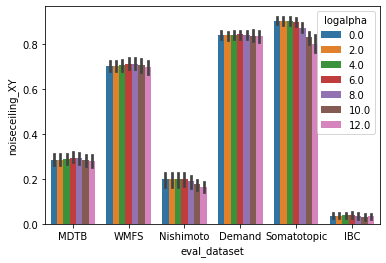

In [6]:
sns.barplot(data=df,x='eval_dataset',y='noiseceiling_XY',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

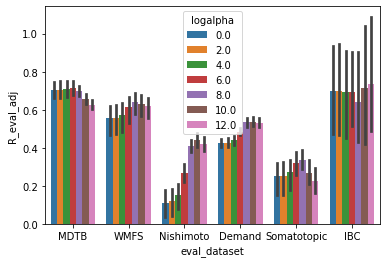

In [7]:
sns.barplot(data=df,x='eval_dataset',y='R_eval_adj',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

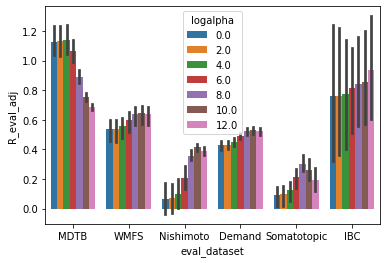

In [9]:
dfall=rm.comb_eval(models=['MD'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval_adj',hue='logalpha')

##  All training data sets

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

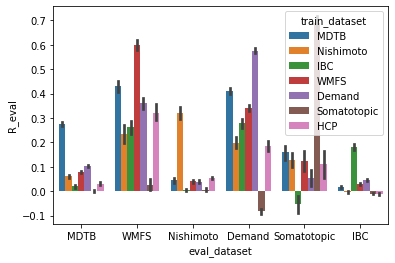

In [4]:
dfall=rm.comb_eval(models=['Md','Ni','Ib','Wm','De','So','Hc'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval',hue='train_dataset')

In [5]:
dfall.to_csv('evaluation_results.csv')


In [6]:
dfall['nanY']=np.isnan(dfall.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfall.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfall.noise_X_R)



In [7]:
pd.pivot_table(data=dfall,index='train_dataset',columns='eval_dataset',values='nanXR',aggfunc='sum')

eval_dataset,Demand,IBC,MDTB,Nishimoto,Somatotopic,WMFS
train_dataset,,,,,,
Demand,0,7,0,0,0,0
HCP,12,57,0,0,1,10
IBC,0,15,0,0,0,0
MDTB,0,5,0,0,0,0
Nishimoto,0,18,0,0,0,0
Somatotopic,0,36,0,0,0,0
WMFS,0,0,0,0,2,0


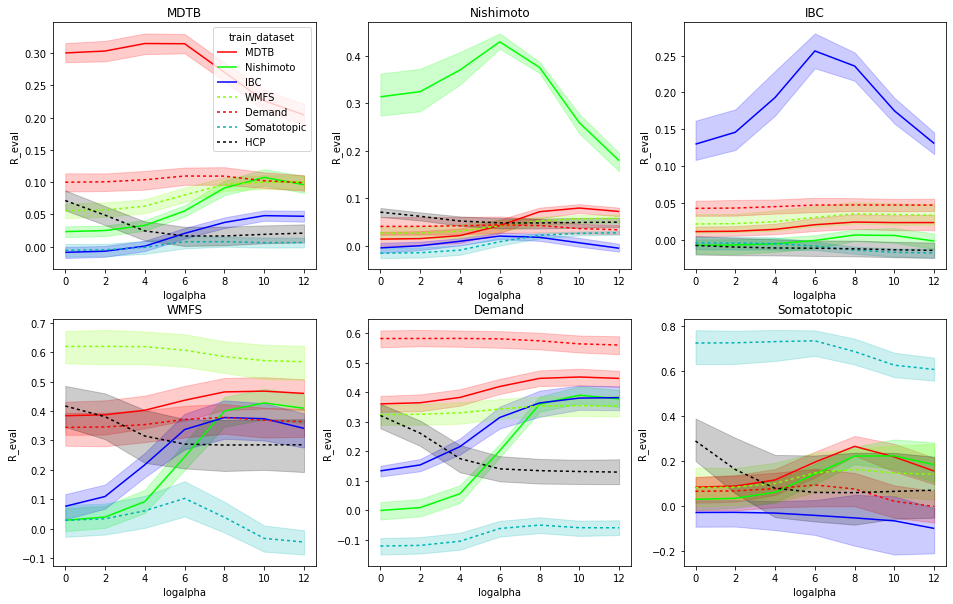

In [8]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
dashes = [[1,0],[1,0],[1,0],[2,2],[2,2],[2,2],[2,2]]

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[dfall.eval_dataset==ed]
    plt.title(ed)
    if i==0:
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',dashes=dashes)
    else: 
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',dashes=dashes,legend=None)


TODO: 
* HCP with lower log-alpha (-2,-4)
* One high log-alpha.... 
* Crossvalidate models on their own dataset across subjects

<AxesSubplot:xlabel='logalpha', ylabel='R_eval'>

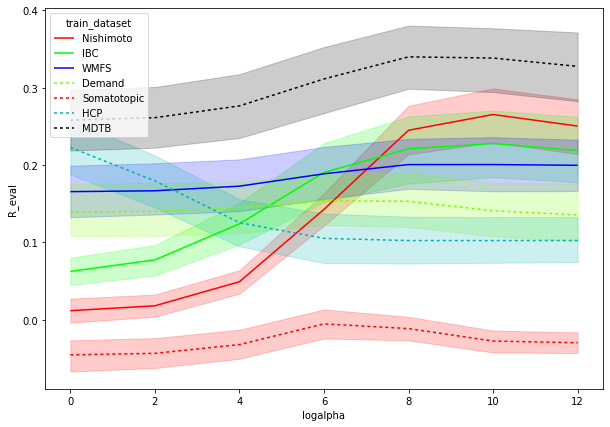

In [13]:
# Plot all evaluations on different datasets 
plt.figure(figsize=(10,7))
d=dfall[dfall.train_dataset!=dfall.eval_dataset]
sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',dashes=dashes)


In [16]:
# determine best logalpha for each model 
pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])

R_eval                                                    \
logalpha           0.0       2.0       4.0       6.0       8.0       10.0   
train_dataset                                                               
Demand         0.139100  0.140063  0.144836  0.153812  0.153080  0.140865   
HCP            0.222668  0.179499  0.125431  0.105120  0.102282  0.102265   
IBC            0.062418  0.077329  0.124013  0.190357  0.220852  0.227731   
MDTB           0.258065  0.261148  0.276385  0.311227  0.339783  0.338223   
Nishimoto      0.011641  0.017989  0.049087  0.142614  0.244870  0.265234   
Somatotopic   -0.045431 -0.043482 -0.032137 -0.005381 -0.011481 -0.027564   
WMFS           0.165542  0.166652  0.172615  0.188624  0.200525  0.200565   

                         
logalpha           12.0  
train_dataset            
Demand         0.135538  
HCP            0.102380  
IBC            0.218588  
MDTB           0.327487  
Nishimoto      0.250303  
Somatotopic   -0.029781  
WMFS           0.199595

In [19]:
A = pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
ind = A.values.argmax(axis=1)
A.columns[ind]

MultiIndex([('R_eval',  6.0),
            ('R_eval',  0.0),
            ('R_eval', 10.0),
            ('R_eval',  8.0),
            ('R_eval', 10.0),
            ('R_eval',  6.0),
            ('R_eval', 10.0)],
           names=[None, 'logalpha'])